In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import matplotlib
matplotlib.rcParams['figure.dpi'] = 300

import scienceplots
plt.style.use(['science', 'no-latex'])

## Data Loading

In [6]:
df_train = pd.read_parquet("../dataset/merged/train.parquet")
df_train = df_train.drop(columns=[x for x in df_train.columns if "_sum" in x] + ["ts", "zone_id"])
df_train.head()

,fe_mean,phyc_mean,aspect_mean,o2_mean,talk_mean,no3_mean,pbo_mean,ph_mean,zos_mean,po4_mean,...,spco2_mean,sob_mean,thetao_mean,chl_mean,dissic_mean,so_mean,slope_mean,wo_mean,target,country
2089960,0.000731,1.342349,163.019699,208.064163,2.383014,0.003861,3195.320557,8.037634,0.448176,0.126750,...,39.747963,34.795700,27.096277,0.106703,2.047723,35.382038,0.361581,3.933147e-07,0,africa
2994767,0.000670,1.249103,171.045944,214.119659,2.351970,0.003131,83.990265,8.076214,0.446728,0.102964,...,35.569496,35.179546,25.087265,0.109940,2.018138,35.004906,0.063022,-1.361349e-08,0,australia
567510,0.000373,1.154349,173.098083,220.064209,2.387686,0.005119,3771.749268,8.073158,0.604767,0.159381,...,36.404430,34.758007,23.520071,0.164665,2.065802,35.290314,2.297422,3.018810e-07,0,africa
2432261,0.000434,2.061642,179.658951,241.412720,2.399612,0.490948,1218.240356,8.091202,0.227556,0.202452,...,34.931534,35.083759,18.168137,0.529301,2.109096,35.626648,1.997733,1.180757e-07,0,australia
2221496,0.000193,0.994760,244.463058,217.995529,2.386178,0.002254,556.183960,8.083446,0.441670,0.090562,...,35.395267,34.758430,23.333628,0.112331,2.060194,35.192139,0.750899,1.057924e-06,0,australia


In [7]:
df_train_under = pd.read_parquet("../dataset/merged/train-undersampled.parquet")
df_train_under = df_train_under.drop(columns=[x for x in df_train_under.columns if "_sum" in x] + ["ts", "zone_id"])
df_train_under.head()

,fe_mean,phyc_mean,aspect_mean,o2_mean,talk_mean,no3_mean,pbo_mean,ph_mean,zos_mean,po4_mean,...,spco2_mean,sob_mean,thetao_mean,chl_mean,dissic_mean,so_mean,slope_mean,wo_mean,target,country
0,0.000068,1.448977,140.262726,247.879471,2.385432,1.223021,3803.686523,8.087553,0.481277,0.354521,...,35.094139,34.734436,17.201546,0.300500,2.112389,35.662247,2.800005,1.434778e-07,0,africa
1,0.000717,1.410883,183.946991,212.950516,2.361088,0.018727,3109.569336,8.076221,0.477179,0.124430,...,35.679771,34.801792,24.825026,0.238459,2.030068,35.086750,0.321104,-7.265795e-07,0,africa
2,0.000224,1.328348,110.708549,211.558746,2.371000,0.006434,2653.863770,8.026756,0.705974,0.181156,...,40.944950,34.796329,26.439785,0.103190,2.046483,35.212002,0.180403,5.330737e-07,0,africa
3,0.000052,1.295012,121.170425,242.248672,2.392732,0.009315,3289.720459,8.100004,0.591997,0.252761,...,33.938564,34.736187,18.304083,0.165829,2.103316,35.746273,0.152815,-2.567063e-07,0,africa
4,0.000315,1.432051,227.875839,226.191284,2.389010,0.037205,4945.865723,8.097643,0.535390,0.164285,...,34.045448,34.729698,21.623854,0.265503,2.072696,35.444912,0.070996,4.254538e-07,0,africa


In [8]:
df_all = pd.concat([df_train.assign(undersampled=False), df_train_under.assign(undersampled=True)], ignore_index=True)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2585524 entries, 0 to 2585523
Data columns (total 28 columns):
 #   Column        Dtype  
---  ------        -----  
 0   fe_mean       float64
 1   phyc_mean     float64
 2   aspect_mean   float64
 3   o2_mean       float64
 4   talk_mean     float64
 5   no3_mean      float64
 6   pbo_mean      float64
 7   ph_mean       float64
 8   zos_mean      float64
 9   po4_mean      float64
 10  tob_mean      float64
 11  nppv_mean     float64
 12  vo_mean       float64
 13  bathy_mean    float64
 14  distance      float64
 15  si_mean       float64
 16  uo_mean       float64
 17  spco2_mean    float64
 18  sob_mean      float64
 19  thetao_mean   float64
 20  chl_mean      float64
 21  dissic_mean   float64
 22  so_mean       float64
 23  slope_mean    float64
 24  wo_mean       float64
 25  target        int64  
 26  country       object 
 27  undersampled  bool   
dtypes: bool(1), float64(25), int64(1), object(1)
memory usage: 535.1+ MB


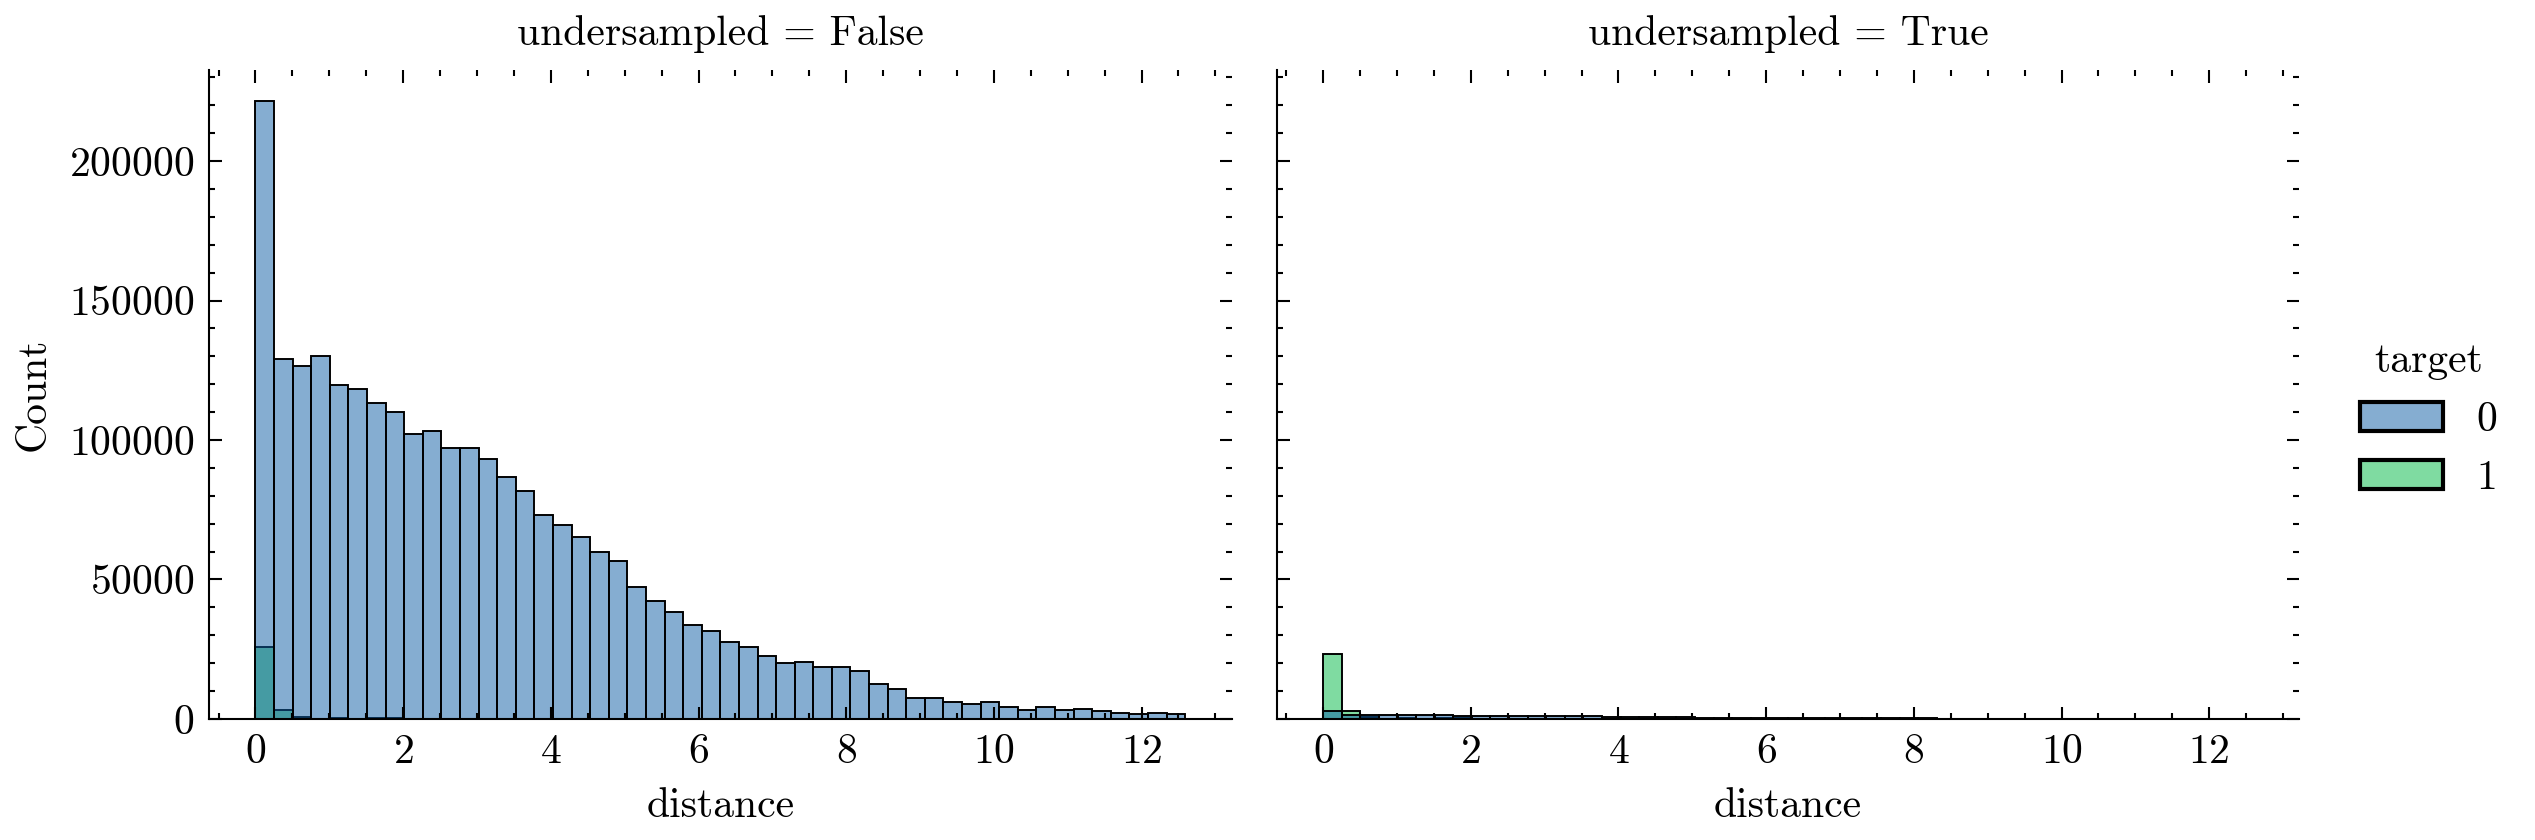

In [16]:
sns.displot(df_all, x="distance", hue="target", kind="hist", col="undersampled", bins=50, height=3, aspect=4/3)
plt.show()

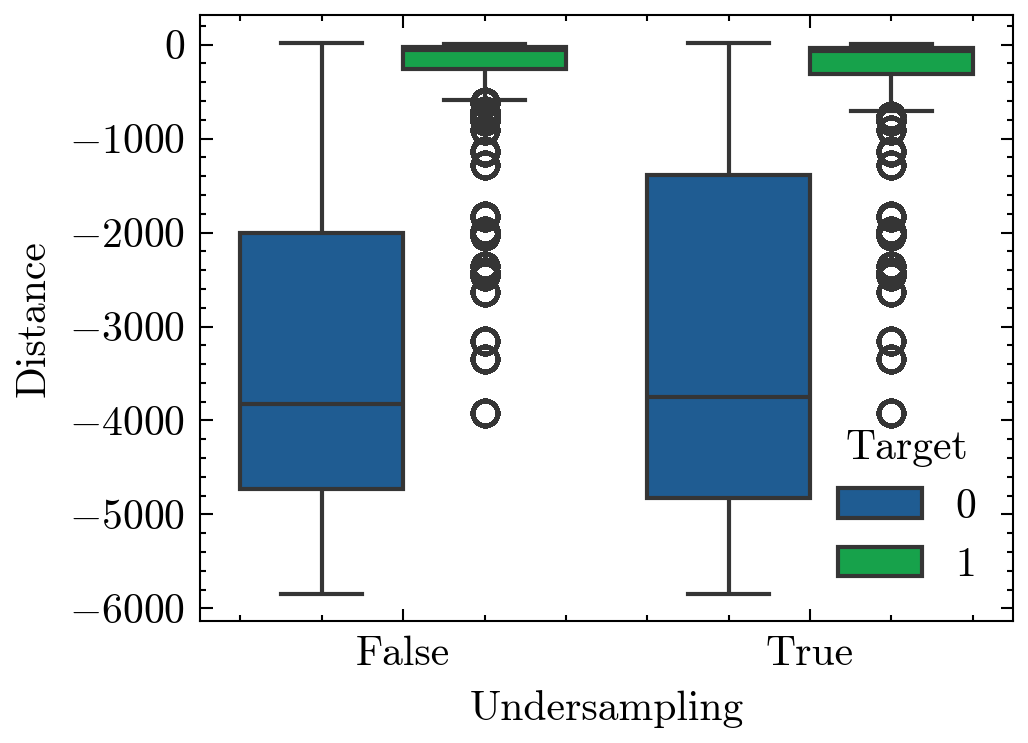

In [25]:
fig, ax = plt.subplots()
g = sns.boxplot(df_all, y="bathy_mean", x="undersampled", hue="target", ax=ax)
g.figure.get_axes()[0].legend(title='Target')
ax.set_xlabel("Undersampling")
ax.set_ylabel("Distance")
plt.show()

In [23]:
df_summary = df_all.groupby(["undersampled", "target"]).describe()
df_summary.head()

fe_mean                                          \
                         count      mean       std       min       25%   
undersampled target                                                      
False        0       2501033.0  0.000540  0.000946  0.000015  0.000113   
             1         30307.0  0.001983  0.001497  0.000035  0.000795   
True         0         27092.0  0.000636  0.001053  0.000015  0.000133   
             1         27092.0  0.001919  0.001488  0.000035  0.000753   

                                                   phyc_mean            ...  \
                          50%       75%       max      count      mean  ...   
undersampled target                                                     ...   
False        0       0.000261  0.000501  0.015254  2501033.0  1.514936  ...   
             1       0.001581  0.002886  0.007165    30307.0  2.169124  ...   
True         0       0.000299  0.000561  0.012709    27092.0  1.550425  ...   
             1       0.001493  0.002775  0.007165    27092.0  2.172678  ...   

                    slope_mean              wo_mean                \
                           75%       max      count          mean   
undersampled target                                                 
False        0        0.938637  9.892877  2501033.0  3.332606e-08   
             1        1.136815  6.961254    30307.0  1.009480e-07   
True         0        1.004465  9.892877    27092.0  3.125664e-08   
             1        1.247106  6.961254    27092.0  1.031660e-07   

                                                                         \
                              std       min           25%           50%   
undersampled target                                                       
False        0       7.333208e-07 -0.000018 -3.089447e-07  3.355789e-08   
             1       1.117320e-06 -0.000006 -4.397934e-07  7.344377e-08   
True         0       7.280613e-07 -0.000007 -3.100203e-07  2.748256e-08   
             1       1.150839e-06 -0.000006 -4.516286e-07  7.352849e-08   

                                             
                              75%       max  
undersampled target                          
False        0       3.786317e-07  0.000015  
             1       6.093618e-07  0.000011  
True         0       3.778129e-07  0.000006  
             1       6.212818e-07  0.000011  

[4 rows x 200 columns]

In [41]:
dfs = df_summary.T.reset_index()
dfs.columns = ['_'.join(map(str, col)).strip() for col in dfs.columns.values]
dfs = dfs.rename(columns={"level_0_": "var_name", "level_1_": "stats"})
dfs = dfs.melt(["var_name", "stats"], ["False_0", "False_1", "True_0", "True_1"])
dfs

,var_name,stats,variable,value
0,fe_mean,count,False_0,2.501033e+06
1,fe_mean,mean,False_0,5.396134e-04
2,fe_mean,std,False_0,9.461442e-04
3,fe_mean,min,False_0,1.502055e-05
4,fe_mean,25%,False_0,1.129005e-04
...,...,...,...,...
795,wo_mean,min,True_1,-6.435596e-06
796,wo_mean,25%,True_1,-4.516286e-07
797,wo_mean,50%,True_1,7.352849e-08
798,wo_mean,75%,True_1,6.212818e-07


In [44]:
dd = dfs.pivot_table(index=["var_name"], columns=["variable", "stats"], values=["value"])
dd.to_csv("meong.csv")
dd

value                                                      \
variable          False_0                                                       
stats                 25%           50%           75%      count          max   
var_name                                                                        
aspect_mean  1.475886e+02  1.765147e+02  2.019913e+02  2501033.0   329.076630   
bathy_mean  -4.733666e+03 -3.820467e+03 -1.999310e+03  2501033.0    23.041667   
chl_mean     1.188771e-01  2.142373e-01  3.302397e-01  2501033.0     4.515948   
dissic_mean  2.037099e+00  2.057420e+00  2.089871e+00  2501033.0     2.251448   
distance     1.044192e+00  2.467671e+00  4.294350e+00  2501033.0    12.590754   
fe_mean      1.129005e-04  2.614987e-04  5.013071e-04  2501033.0     0.015254   
no3_mean     2.870116e-03  9.830529e-03  1.716338e-01  2501033.0    16.984200   
nppv_mean    3.209680e+00  6.349630e+00  1.250169e+01  2501033.0   185.842987   
o2_mean      2.079792e+02  2.145828e+02  2.311183e+02  2501033.0   284.740601   
pbo_mean     2.018209e+03  3.845894e+03  4.773323e+03  2501033.0  5866.028809   
ph_mean      8.038794e+00  8.064929e+00  8.081818e+00  2501033.0     8.168495   
phyc_mean    1.150300e+00  1.388877e+00  1.710116e+00  2501033.0    15.225039   
po4_mean     1.359401e-01  1.648780e-01  2.309846e-01  2501033.0     0.828432   
si_mean      2.417391e+00  2.822553e+00  3.128983e+00  2501033.0    29.660900   
slope_mean   1.548219e-01  3.750800e-01  9.386374e-01  2501033.0     9.892877   
so_mean      3.507354e+01  3.533872e+01  3.552307e+01  2501033.0    43.070492   
sob_mean     3.471502e+01  3.472628e+01  3.476441e+01  2501033.0    43.100346   
spco2_mean   3.548862e+01  3.693047e+01  3.949573e+01  2501033.0   110.712448   
talk_mean    2.364949e+00  2.379303e+00  2.388386e+00  2501033.0     2.608870   
thetao_mean  1.994559e+01  2.419823e+01  2.619891e+01  2501033.0    32.487961   
tob_mean     7.048870e-01  1.172712e+00  2.654561e+00  2501033.0    32.475456   
uo_mean     -1.797910e-01 -4.166299e-02  6.788535e-02  2501033.0     1.770177   
vo_mean     -1.164373e-01 -7.344905e-03  9.351861e-02  2501033.0     1.912254   
wo_mean     -3.089447e-07  3.355789e-08  3.786317e-07  2501033.0     0.000015   
zos_mean     2.724986e-01  4.718431e-01  6.219963e-01  2501033.0     1.278016   

                                                                    \
variable                                                   False_1   
stats                mean          min           std           25%   
var_name                                                             
aspect_mean  1.756202e+02    26.521505  4.547948e+01  1.550979e+02   
bathy_mean  -3.272348e+03 -5844.891782  1.766693e+03 -2.561913e+02   
chl_mean     2.485223e-01     0.040145  1.705519e-01  1.747822e-01   
dissic_mean  2.060349e+00     0.923143  4.741206e-02  1.996832e+00   
distance     2.953576e+00     0.000000  2.395551e+00  0.000000e+00   
fe_mean      5.396134e-04     0.000015  9.461442e-04  7.950024e-04   
no3_mean     2.963912e-01     0.000385  7.588284e-01  3.496684e-03   
nppv_mean    9.293816e+00     0.199807  8.915055e+00  5.892628e+00   
o2_mean      2.213303e+02   189.027893  1.789924e+01  2.086308e+02   
pbo_mean     3.304852e+03     7.023693  1.780786e+03  2.880488e+01   
ph_mean      8.060383e+00     7.372023  2.708586e-02  8.054913e+00   
phyc_mean    1.514936e+00     0.662077  6.036276e-01  1.446635e+00   
po4_mean     1.882094e-01     0.000077  8.700422e-02  8.338948e-02   
si_mean      2.764238e+00     0.443686  6.959480e-01  2.651858e+00   
slope_mean   8.062659e-01     0.006359  1.109789e+00  1.619773e-01   
so_mean      3.523987e+01    14.182465  5.712404e-01  3.488314e+01   
sob_mean     3.478848e+01    14.162687  4.537315e-01  3.476962e+01   
spco2_mean   3.752210e+01    26.105629  2.646781e+00  3.416413e+01   
talk_mean    2.371295e+00     0.925813  3.420974e-02  2.333418e+00   
thetao_mean  2.283232e+01    10.595529  4.413105e+00  2.1814

In [155]:
dsub = dd[[("value", "False_0", "mean"), ("value", "False_1", "mean"), ("value", "True_0", "mean"), ("value", "True_1", "mean")]].copy().reset_index()
dsub.columns = ["var_name", "no_under_0", "no_under_1", "under_0", "under_1"]

dsub["pct_0"]  = (dsub["no_under_0"] - dsub["under_0"]) / dsub["under_0"]
dsub["pct_1"]  = (dsub["no_under_1"] - dsub["under_1"]) / dsub["under_1"]

dsub

,var_name,no_under_0,no_under_1,under_0,under_1,pct_0,pct_1
0,aspect_mean,1.756202e+02,1.851674e+02,1.794636e+02,1.831396e+02,-0.021416,0.011073
1,bathy_mean,-3.272348e+03,-3.942761e+02,-3.142334e+03,-4.315005e+02,0.041375,-0.086268
2,chl_mean,2.485223e-01,3.676233e-01,2.612611e-01,3.689809e-01,-0.048759,-0.003679
3,dissic_mean,2.060349e+00,2.029001e+00,2.062657e+00,2.029901e+00,-0.001119,-0.000443
4,distance,2.953576e+00,1.242111e-01,2.829444e+00,1.156179e-01,0.043871,0.074324
5,fe_mean,5.396134e-04,1.983448e-03,6.361644e-04,1.918735e-03,-0.151771,0.033727
6,no3_mean,2.963912e-01,9.553176e-02,3.824600e-01,1.016233e-01,-0.225040,-0.059943
7,nppv_mean,9.293816e+00,1.502816e+01,9.113860e+00,1.499787e+01,0.019745,0.002020
8,o2_mean,2.213303e+02,2.166153e+02,2.243199e+02,2.165415e+02,-0.013327,0.000341
9,pbo_mean,3.304852e+03,4.003086e+02,3.181713e+03,4.383183e+02,0.038702,-0.086717


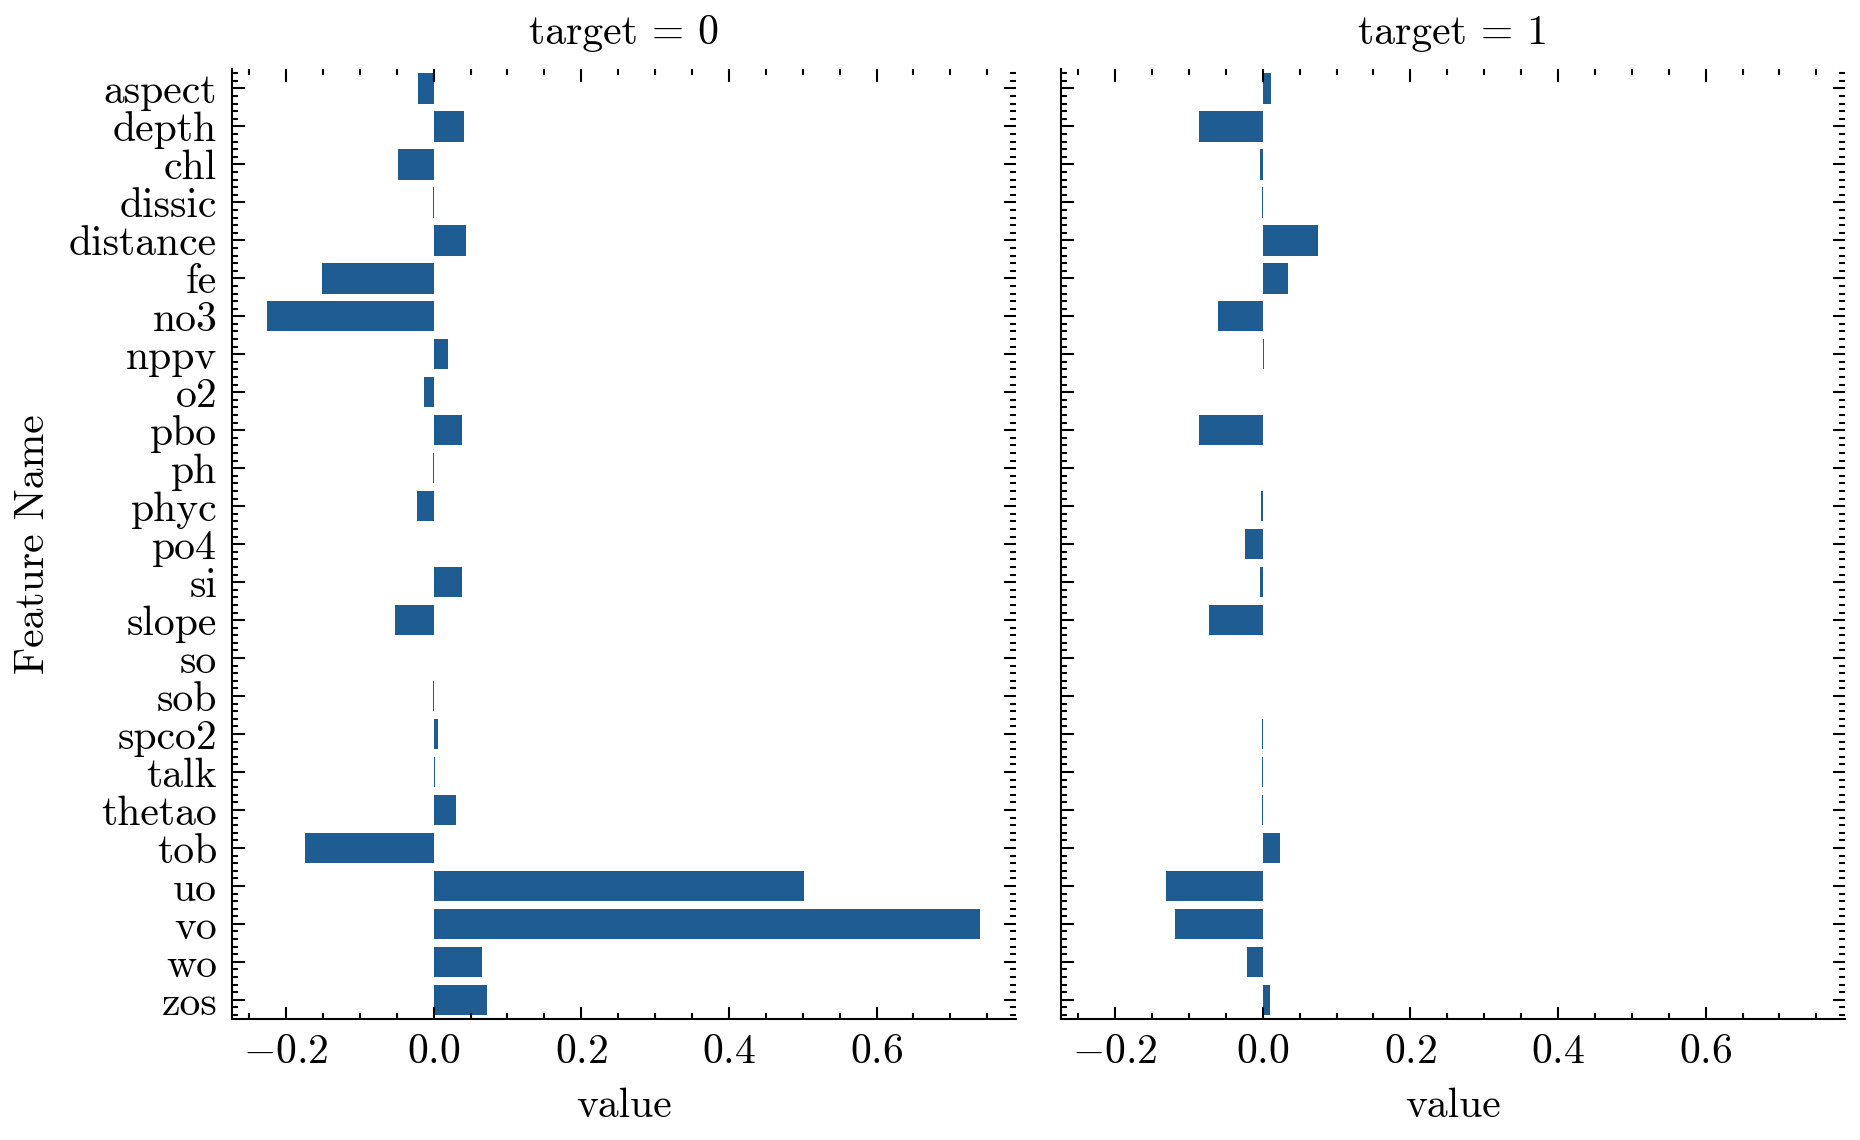

In [ ]:
dsub_vis = dsub.melt(["var_name"], ["pct_0", "pct_1"]).rename(columns={"variable": "target"})
dsub_vis["target"] = dsub_vis["target"].replace({"pct_0": "0", "pct_1": "1"})
dsub_vis["var_name"] = dsub_vis["var_name"].str.replace("_mean", "").str.replace("bathy", "depth")

g = sns.FacetGrid(dsub_vis, col="target", height=4, aspect=4/5)
g.map_dataframe(sns.barplot, x="value", y="var_name")
for i, ax in enumerate(g.axes.flat):
    ax.set_xlabel("% Change")
    if i == 0:
        ax.set_ylabel("Feature Name")

g.figure.savefig("FIG-10.jpg")
g.figure.savefig("FIG-10.pdf")

plt.show()

In [167]:
dor = dsub.copy()
dor["pct_0"] = np.abs(dor["pct_0"])
dor["pct_1"] = np.abs(dor["pct_1"])

dor.sort_values("pct_1", ascending=False).style.background_gradient()

,var_name,no_under_0,no_under_1,under_0,under_1,pct_0,pct_1
21,uo_mean,-0.057725,-0.032101,-0.038454,-0.036913,0.501150,0.130351
22,vo_mean,-0.013492,-0.032295,-0.007752,-0.036622,0.740498,0.118163
9,pbo_mean,3304.851982,400.308639,3181.712837,438.318334,0.038702,0.086717
1,bathy_mean,-3272.348203,-394.276062,-3142.334038,-431.500536,0.041375,0.086268
4,distance,2.953576,0.124211,2.829444,0.115618,0.043871,0.074324
14,slope_mean,0.806266,0.924642,0.850518,0.997364,0.052029,0.072914
6,no3_mean,0.296391,0.095532,0.382460,0.101623,0.225040,0.059943
5,fe_mean,0.000540,0.001983,0.000636,0.001919,0.151771,0.033727
12,po4_mean,0.188209,0.121600,0.188038,0.124656,0.000910,0.024513
20,tob_mean,4.369276,18.715345,5.293368,18.293760,0.174575,0.023045
